# **Time Series Analysis and Forecasting.**
**This notebook includes various time-series models like:**

1.   Naive Method.
2.   Simple Average Method.
3.   Drift Method.
4.   Simple moving average technique.
5.   Simple exponential moving technique.
6.   Holt's Exponential Smootihing Technique.
7.   Holt Winter's Exponential Smootihing Technique.



# **Air passenger traffic problem**

**A time series fore-casting problem is divided into 4 stages:**

1.   Defining the problem.
2.   Collection of data.
3.   Analyze the data.
4.   Build and evaluate Forecast model.



### **1. Defining the problem: Defining a problem deals with defining 4 main objectives to be taken care of:**

1.   Quantity: Number of passengers
2.   Granularity: Flight for a particular route(Point A to Point B)
3.   Frequency: Monthly
4.   Horizon: 12 months.

### **Forecasting can be approached in 2 ways:**
**1.   Bottom up approach:**
Start with the most granular level. Forecast for the most granular level data for the horizon decided and then aggregate them by summing to come up with a forecast for a lesser granular level.

**2.   Top down approach:** 
Start with the least granular level. Forecast for the most granular level data for the horizon decided and then break it down into more granular level with a proportion to reach at the granularity we have defined.

### **2. Collection of data: 3 important characteristics that needs to be exhibited by a time series data for accurate predictions:**

1.   Relevant
2.   Accurate
3.   Long enough

### **Types of data sources:**

1.   Private/ Enterprise data
2.   Public data
3.   System/ Sensor data.

### **3. Analyze the data: Different components associated to Time-Series are-**

1.   Level: This is the baseline of a time series. This gives the baseline to which we add the different other components.
2.   Trend: Over a longterm, this gives an indication of whether the time series moves lower or higher. Example: Sensex
3.   Seasonality: It is a pattern in a time-series data that repeats itself after a given period of time. Example: Winter wear sales increase from November-January
4.   Cyclicity: It is also a repeating pattern in data that repeats itself aperiodically.
5.   Noise:Noise is the completely random fluctuation present in the data and we cannot use this component to forecast into the future.





In [1]:
#Importing packages:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import data
data=pd.read_csv('airline passenger traffic.csv', header=None)
data.columns=['Month', 'Passengers']
data.Month=pd.to_datetime(data.Month, format='%Y-%m')
data=data.set_index('Month')
data.head()

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


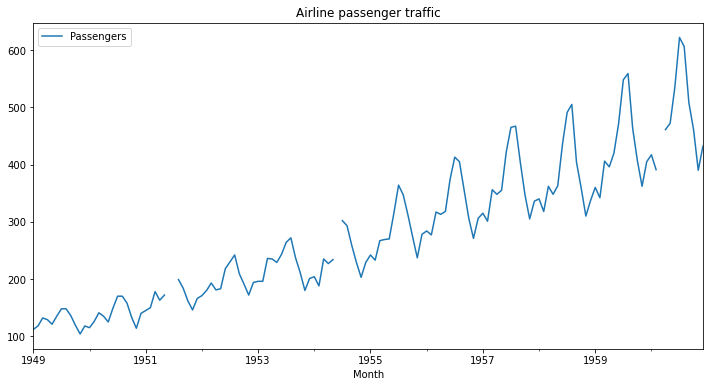

In [3]:
#Plotting the time series data
data.plot(figsize=(12,6))
plt.legend(loc='best')
plt.title('Airline passenger traffic')
plt.show(block=False)

# **Treating missing values**

Here there are visible missing values. These missing values can be imputed using a few approaches:

1.   Mean or median: Bad approach sInce it doesn't take the trend and seasonality into consideration.
2.   Last observation carried forward: This approach is bad again because it doesn't take care of the trend and the seasonality.
3.   Linear Interpolation: We can take the average of the last present observation and the next present observation and impute the missing values with the same. This will take the trend into consideration but wont take seasonality into consideration. For taking seasonality into account we need to modify linear interpolation slighlty.
4.   Seasonal+ Linear interpolation: To take seasonality into account while performing Linear interpolation, instead of taking the average of last and next present observation we must take average of the observation one year before and one year later for the same month(time units can be changed as per use cases)



In [4]:
#Imputing missing data with mean and linear interpolation
data['Missing_Value_Imputation_Mean']=data.Passengers.fillna(data.Passengers.mean())
data['Missing_Values_Linear_Interpolation']=data.Passengers.fillna(data.Passengers.interpolate(method='linear'))

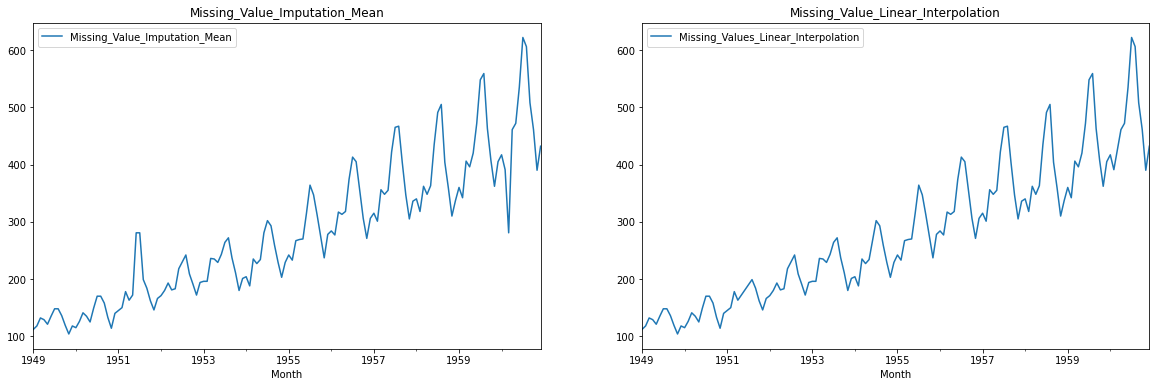

In [5]:
plt.figure(figsize=(20,6))
plt.subplot(121)
data.Missing_Value_Imputation_Mean.plot()
plt.legend(loc='best')
plt.title('Missing_Value_Imputation_Mean')
plt.subplot(122)
data.Missing_Values_Linear_Interpolation.plot()
plt.legend(loc='best')
plt.title('Missing_Value_Linear_Interpolation')
plt.show()

Imputation using linear interpolation serves the purpose of maintaining the trend

In [6]:
data.Passengers=data['Missing_Values_Linear_Interpolation']

**Note: Need to learn to code Seasonal+ Linear interpolation**

# **Analyzing and treating outliers**

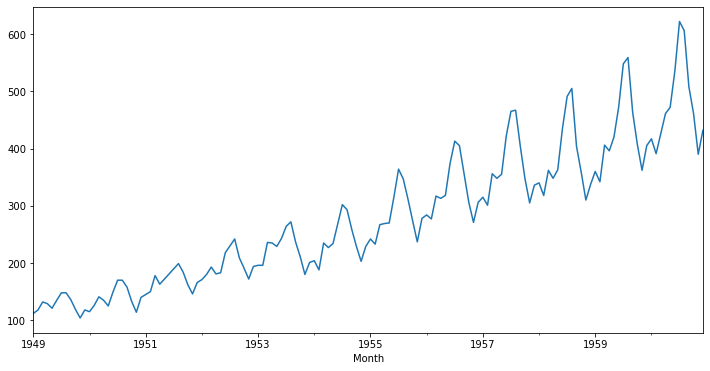

In [7]:
plt.figure(figsize=(12,6))
data.Passengers.plot()
plt.show()

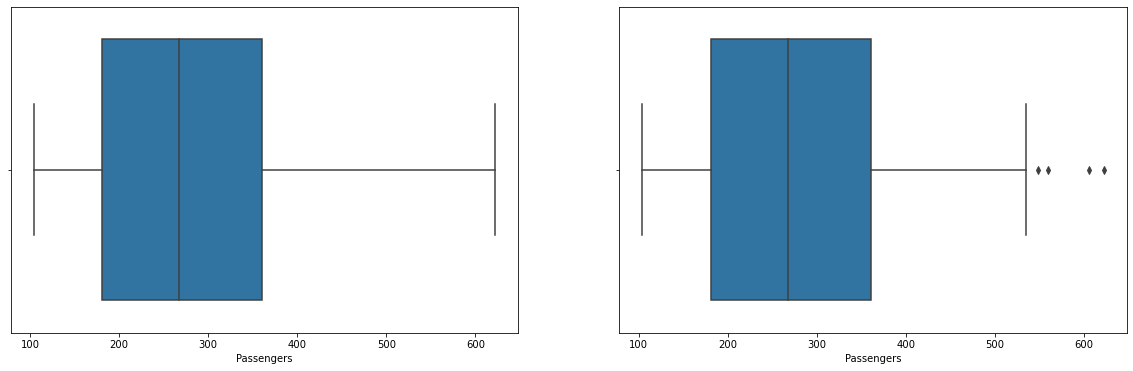

In [8]:
plt.figure(figsize=(20,6))
plt.subplot(121)
sns.boxplot(data.Passengers, whis=1.5)
plt.subplot(122)
sns.boxplot(data.Passengers, whis=1)
plt.show()

In graph 2, it is visible that there are 4 values greater than 75th percentile+IQR while in graph 1, there are 0 values greater than 75th percentile+ 1.5(IQR). While looking at the trend graph above, it is evident that these 4 values are as a result of a cyclical nature of the trend and hence cannot be considered as an outlier.

Plotting a histogram to check the continuity of the same

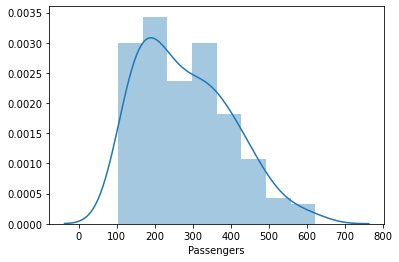

In [9]:
sns.distplot(data.Passengers)
plt.show()

The continuity is not broken here.

# **Decomposition of Time-series data**

Before building a model, we must understand decomposition of time series data into its various components like trend, seasonality and residuals(Left over part after extracting trend and seasonality)

Time series data has these 2 main components: Trend and seasonality. On inspection oif these components, we can understand which methods to apply to capture the seasonal effects of time-series data.

There are 2 methods in which time-series data can be decomposed:
1.   **Additive decomposition:** The individual components such as trend, seasonality and random noise can be added together to get the original time-series data.
2.   **Multiplicative decomposition:** The individual components such as trend, seasonality and random noise can be multiplied together to get the original time-series data.

**Additive Seasonal Decomposition**

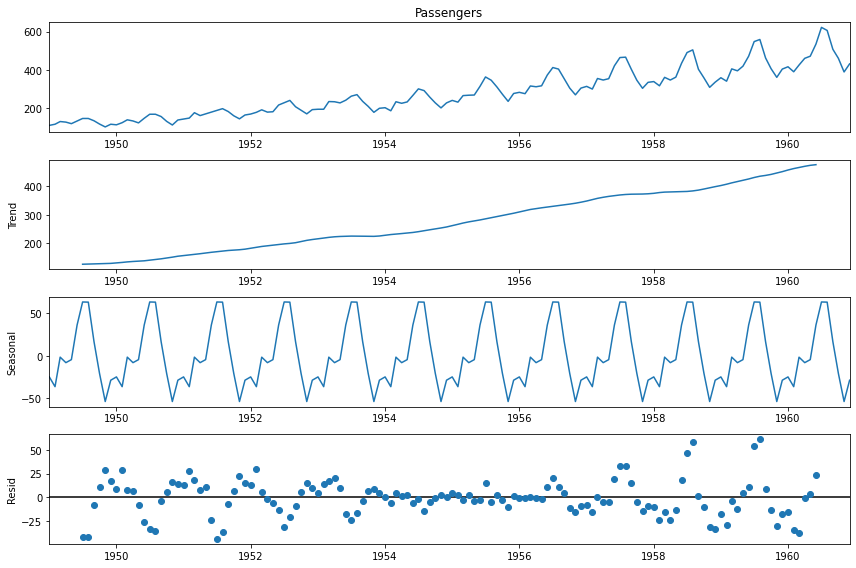

In [10]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize']=12,8
decomposition=sm.tsa.seasonal_decompose(data.Passengers, model='additive')
fig=decomposition.plot()
plt.show()

**Multiplicative Seasonal Decomposition**

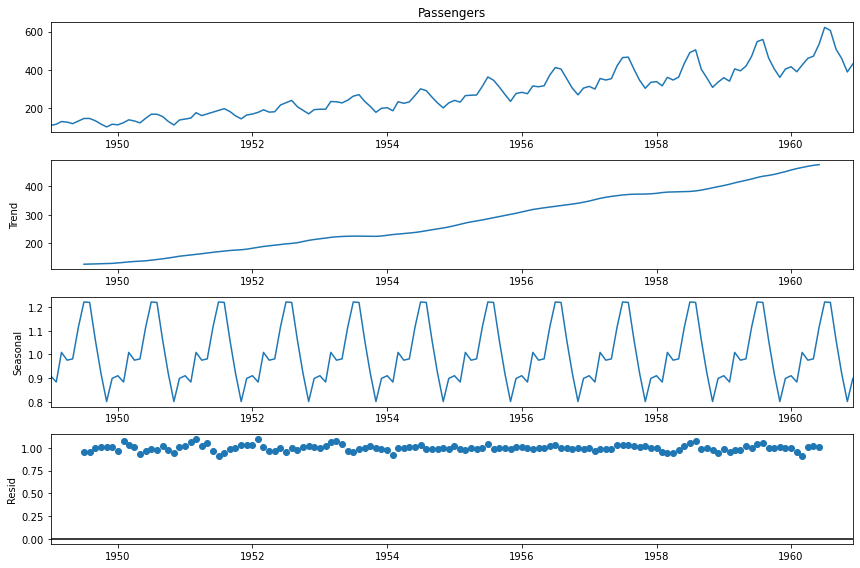

In [11]:
rcParams['figure.figsize']=12,8
decomposition=sm.tsa.seasonal_decompose(data.Passengers, model='multiplicative')
fig=decomposition.plot()
plt.show()

# **Modelling**

1.   Naive Method
2.   Simple Average Method
3.   Drift Method



### **1. Naive Method**

In [12]:
data.shape

(144, 3)

In [13]:
train_data=data.iloc[:120,:]
test_data=data.iloc[120:,:]
print(train_data.shape)
print(test_data.shape)

(120, 3)
(24, 3)


In [14]:
test_data_naive=test_data.copy()
test_data_naive['Naive prediction']=data.Passengers[len(train_data)-1]

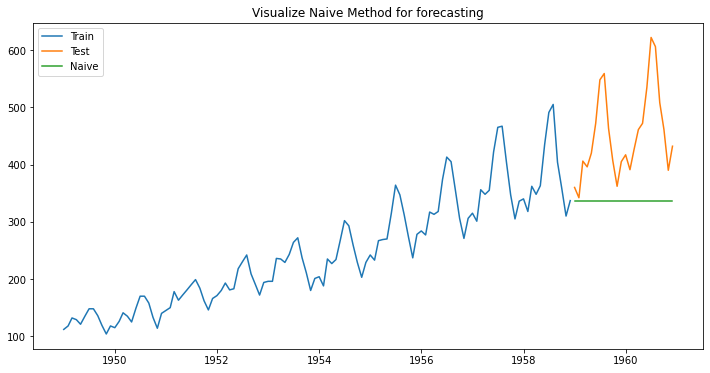

In [15]:
plt.figure(figsize=(12,6))
plt.plot(train_data['Passengers'], label='Train')
plt.plot(test_data['Passengers'], label='Test')
plt.plot(test_data_naive['Naive prediction'], label='Naive')
plt.legend(loc='best')
plt.title('Visualize Naive Method for forecasting')
plt.show()

### **2. Simple Average Model**

In [16]:
test_data_sim_avg=test_data.copy()
test_data_sim_avg['New pred']=np.mean(train_data['Passengers'])

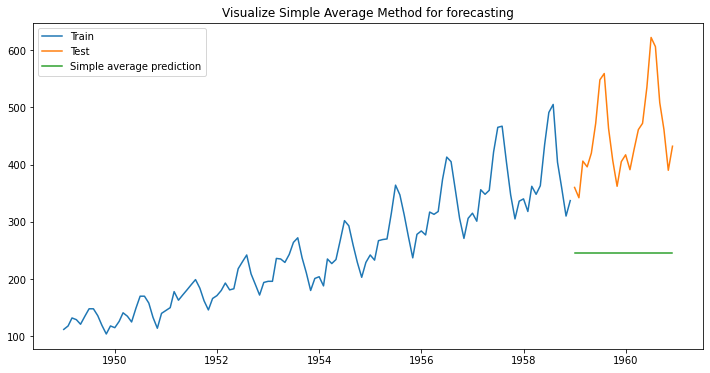

In [17]:
plt.figure(figsize=(12,6))
plt.plot(train_data['Passengers'], label='Train')
plt.plot(test_data['Passengers'], label='Test')
plt.plot(test_data_sim_avg['New pred'], label='Simple average prediction')
plt.legend(loc='best')
plt.title('Visualize Simple Average Method for forecasting')
plt.show()

# **Error Measures:**
There are a few error measures available for evaluating time series models:

1.   Mean forecast error(MFE): Average of differences between the actual value and the forecast prediction.
2.   Mean Absolute error(MAE): Average of absolute differences between the actual value and the predicted forecast.
3.   Mean absolute percentage error(MAPE): Average of percentages of MAE.
4.   Mean squared error(MSE).
5.   Root mean squared error(RMSE).

**Applications of error measures:**
1.   Since MFE has + and - signs, a lot of error values nullify each other. Hence MFE can be used to evaluate and analyze if the overall forecast is over predicting or under-predicting.
2.    MAE shows us the divergence that our actual line and the forecast line has. But the problem with MAE is that even if we have the error value, we do not know with what we must compare it with. If it is 1.5 w.r.t single digit actual values, the error is huge but if it is w.r.t 1000 or 10000 it is a good model.
3.   To take  care of the same we use MAPE, to capture how the forecast is doing based upon the actual values.
4.   The idea behind mean squared error is the same as mean absolute error, i.e., you want to capture the absolute deviations so that the negative and positive deviations do not cancel each other out.
5.   The error term from MSE is not in the same dimension as the target variable 'y' (it is squared), we use a metric known as RMSE wherein you take the square root of the MSE value obtained.

In [18]:
MFE_1=np.mean(test_data_naive['Naive prediction']-test_data['Passengers'])
MAE_1=np.mean(abs(test_data_naive['Naive prediction']-test_data['Passengers']))
MAPE_1=np.mean(100*abs(test_data_naive['Naive prediction']-test_data['Passengers'])/test_data['Passengers'])
MSE_1=np.mean((test_data_naive['Naive prediction']-test_data['Passengers'])**2)
RMSE_1=np.sqrt(MSE_1)
print(MFE_1, MAE_1, MAPE_1, MSE_1, RMSE_1)

-115.54166666666667 115.54166666666667 23.632534624153944 18909.125 137.51045414803923


In [19]:
MFE_2=np.mean(test_data_sim_avg['New pred']-test_data['Passengers'])
MAE_2=np.mean(abs(test_data_sim_avg['New pred']-test_data['Passengers']))
MAPE_2=np.mean(100*abs(test_data_sim_avg['New pred']-test_data['Passengers'])/test_data['Passengers'])
MSE_2=np.mean((test_data_sim_avg['New pred']-test_data['Passengers'])**2)
RMSE_2=np.sqrt(MSE_2)
print(MFE_2, MAE_2, MAPE_2, MSE_2, RMSE_2)

-206.65 206.65 44.278565755561594 48263.4707638889 219.68948714922365


In [20]:
Model_Eval=pd.DataFrame({'Model': ['Naive Method', 'Simple average method'],
                         'MFE': [MFE_1, MFE_2],
                         'MAE': [MAE_1, MAE_2],
                         'MAPE': [MAPE_1, MAPE_2],
                         'MSE': [MSE_1, MSE_2],
                         'RMSE': [RMSE_1, RMSE_2]})
Model_Eval

,Model,MFE,MAE,MAPE,MSE,RMSE
0,Naive Method,-115.541667,115.541667,23.632535,18909.125000,137.510454
1,Simple average method,-206.650000,206.650000,44.278566,48263.470764,219.689487


Based on the evaluation parameters Naive method is giving a better prediction.

# **Moving Averages:**
It works on 2 principles:
1.   The near past is a great estimator for the future.
2.   It also helps in reducing non-systematic noise in the data.

In [21]:
data_moving_average=data.copy()
data_moving_average.head()

,Passengers,Missing_Value_Imputation_Mean,Missing_Values_Linear_Interpolation
Month,,,
1949-01-01,112.0,112.0,112.0
1949-02-01,118.0,118.0,118.0
1949-03-01,132.0,132.0,132.0
1949-04-01,129.0,129.0,129.0
1949-05-01,121.0,121.0,121.0


In [22]:
rolling_window=12
data_moving_average['Moving_Avg']=data_moving_average['Passengers'].rolling(rolling_window).mean()
data_moving_average['Moving_Avg'][len(train_data):]=data_moving_average['Moving_Avg'][len(train_data)-1]
data_moving_average.head()

,Passengers,Missing_Value_Imputation_Mean,Missing_Values_Linear_Interpolation,Moving_Avg
Month,,,,
1949-01-01,112.0,112.0,112.0,NaN
1949-02-01,118.0,118.0,118.0,NaN
1949-03-01,132.0,132.0,132.0,NaN
1949-04-01,129.0,129.0,129.0,NaN
1949-05-01,121.0,121.0,121.0,NaN


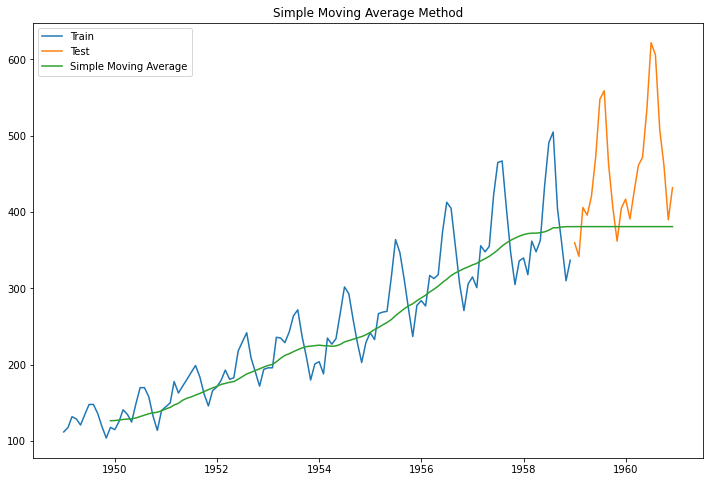

In [23]:
plt.figure(figsize=(12,8))
plt.plot(train_data['Passengers'], label='Train')
plt.plot(test_data['Passengers'], label='Test')
plt.plot(data_moving_average['Moving_Avg'], label='Simple Moving Average')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [24]:
MFE_3=np.mean(data_moving_average['Moving_Avg'][120:]-test_data['Passengers'])
MAE_3=np.mean(abs(data_moving_average['Moving_Avg'][120:]-test_data['Passengers']))
MAPE_3=np.mean(100*abs((data_moving_average['Moving_Avg'][120:]-test_data['Passengers'])/test_data['Passengers']))
MSE_3=np.mean((data_moving_average['Moving_Avg'][120:]-test_data['Passengers'])**2)
RMSE_3=np.sqrt(np.mean((data_moving_average['Moving_Avg'][120:]-test_data['Passengers'])**2))


In [25]:
Model_Eval=Model_Eval.append({'Model':'Simple Moving Average',
                              'MFE': MFE_3,
                              'MAE': MAE_3,
                              'MAPE': MAPE_3,
                              'MSE': MSE_3,
                              'RMSE': RMSE_3}, ignore_index=True)
Model_Eval

,Model,MFE,MAE,MAPE,MSE,RMSE
0,Naive Method,-115.541667,115.541667,23.632535,18909.125000,137.510454
1,Simple average method,-206.650000,206.650000,44.278566,48263.470764,219.689487
2,Simple Moving Average,-71.541667,78.125000,15.535497,10677.458333,103.331788


In [26]:
rolling_window=6
data_moving_average['Moving_Avg']=data_moving_average['Passengers'].rolling(rolling_window).mean()
data_moving_average['Moving_Avg'][len(train_data):]=data_moving_average['Moving_Avg'][len(train_data)-1]
data_moving_average.head()

,Passengers,Missing_Value_Imputation_Mean,Missing_Values_Linear_Interpolation,Moving_Avg
Month,,,,
1949-01-01,112.0,112.0,112.0,NaN
1949-02-01,118.0,118.0,118.0,NaN
1949-03-01,132.0,132.0,132.0,NaN
1949-04-01,129.0,129.0,129.0,NaN
1949-05-01,121.0,121.0,121.0,NaN


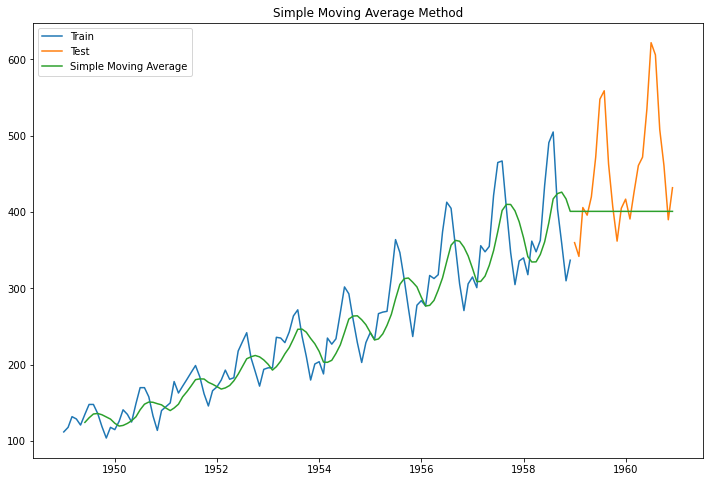

In [27]:
plt.figure(figsize=(12,8))
plt.plot(train_data['Passengers'], label='Train')
plt.plot(test_data['Passengers'], label='Test')
plt.plot(data_moving_average['Moving_Avg'], label='Simple Moving Average')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [28]:
MFE_3=np.mean(data_moving_average['Moving_Avg'][120:]-test_data['Passengers'])
MAE_3=np.mean(abs(data_moving_average['Moving_Avg'][120:]-test_data['Passengers']))
MAPE_3=np.mean(100*abs((data_moving_average['Moving_Avg'][120:]-test_data['Passengers'])/test_data['Passengers']))
MSE_3=np.mean((data_moving_average['Moving_Avg'][120:]-test_data['Passengers'])**2)
RMSE_3=np.sqrt(np.mean((data_moving_average['Moving_Avg'][120:]-test_data['Passengers'])**2))


In [29]:
Model_Eval=Model_Eval.append({'Model':'Simple Moving Average_6',
                              'MFE': MFE_3,
                              'MAE': MAE_3,
                              'MAPE': MAPE_3,
                              'MSE': MSE_3,
                              'RMSE': RMSE_3}, ignore_index=True)
Model_Eval

,Model,MFE,MAE,MAPE,MSE,RMSE
0,Naive Method,-115.541667,115.541667,23.632535,18909.125000,137.510454
1,Simple average method,-206.650000,206.650000,44.278566,48263.470764,219.689487
2,Simple Moving Average,-71.541667,78.125000,15.535497,10677.458333,103.331788
3,Simple Moving Average_6,-51.541667,65.291667,12.967391,8215.791667,90.641004


In [30]:
rolling_window=3
data_moving_average['Moving_Avg']=data_moving_average['Passengers'].rolling(rolling_window).mean()
data_moving_average['Moving_Avg'][len(train_data):]=data_moving_average['Moving_Avg'][len(train_data)-1]
data_moving_average.head()

,Passengers,Missing_Value_Imputation_Mean,Missing_Values_Linear_Interpolation,Moving_Avg
Month,,,,
1949-01-01,112.0,112.0,112.0,NaN
1949-02-01,118.0,118.0,118.0,NaN
1949-03-01,132.0,132.0,132.0,120.666667
1949-04-01,129.0,129.0,129.0,126.333333
1949-05-01,121.0,121.0,121.0,127.333333


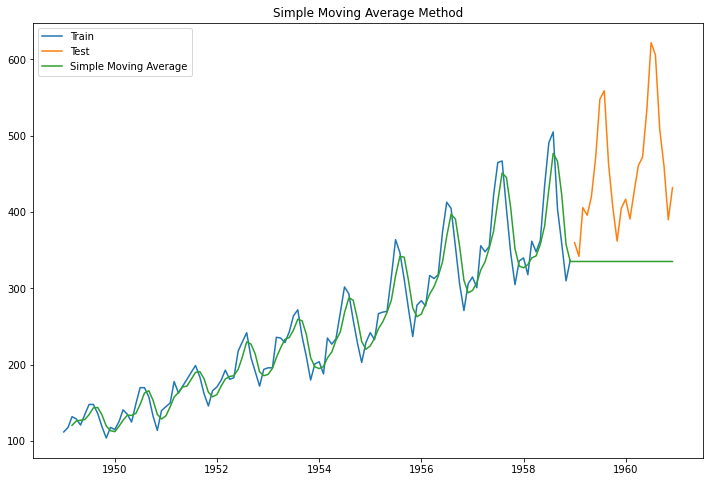

In [31]:
plt.figure(figsize=(12,8))
plt.plot(train_data['Passengers'], label='Train')
plt.plot(test_data['Passengers'], label='Test')
plt.plot(data_moving_average['Moving_Avg'], label='Simple Moving Average')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [32]:
MFE_4=np.mean(data_moving_average['Moving_Avg'][120:]-test_data['Passengers'])
MAE_4=np.mean(abs(data_moving_average['Moving_Avg'][120:]-test_data['Passengers']))
MAPE_4=np.mean(100*abs((data_moving_average['Moving_Avg'][120:]-test_data['Passengers'])/test_data['Passengers']))
MSE_4=np.mean((data_moving_average['Moving_Avg'][120:]-test_data['Passengers'])**2)
RMSE_4=np.sqrt(np.mean((data_moving_average['Moving_Avg'][120:]-test_data['Passengers'])**2))


In [33]:
Model_Eval=Model_Eval.append({'Model':'Simple Moving Average_3',
                              'MFE': MFE_4,
                              'MAE': MAE_4,
                              'MAPE': MAPE_4,
                              'MSE': MSE_4,
                              'RMSE': RMSE_4}, ignore_index=True)
Model_Eval

,Model,MFE,MAE,MAPE,MSE,RMSE
0,Naive Method,-115.541667,115.541667,23.632535,18909.125000,137.510454
1,Simple average method,-206.650000,206.650000,44.278566,48263.470764,219.689487
2,Simple Moving Average,-71.541667,78.125000,15.535497,10677.458333,103.331788
3,Simple Moving Average_6,-51.541667,65.291667,12.967391,8215.791667,90.641004
4,Simple Moving Average_3,-117.208333,117.208333,24.010217,19297.041667,138.913792


# **Simple Exponential Moving Technique**

In [34]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model=SimpleExpSmoothing(train_data.Passengers)

In [35]:
model_fit=model.fit(smoothing_level=0.2, optimized=False)
model_fit.params

{'smoothing_level': 0.2,
 'smoothing_slope': None,
 'smoothing_seasonal': None,
 'damping_slope': nan,
 'initial_level': 112.0,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [36]:
semt_forecast_df=test_data.copy()
semt_forecast_df['Forecast']=model_fit.forecast(24)

In [37]:
mfe_5=np.mean(semt_forecast_df['Passengers']-semt_forecast_df['Forecast'])
mae_5=np.mean(abs(semt_forecast_df['Passengers']-semt_forecast_df['Forecast']))
mape_5=np.mean(100*abs(semt_forecast_df['Passengers']-semt_forecast_df['Forecast'])/semt_forecast_df['Passengers'])
mse_5=np.mean((semt_forecast_df['Passengers']-semt_forecast_df['Forecast'])**2)
rmse_5=np.sqrt(mse_5)

In [38]:
Model_Eval=Model_Eval.append({'Model':'Simple Exponential Moving Average',
                              'MFE': mfe_5,
                              'MAE': mae_5,
                              'MAPE': mape_5,
                              'MSE': mse_5,
                              'RMSE': rmse_5}, ignore_index=True)
Model_Eval

,Model,MFE,MAE,MAPE,MSE,RMSE
0,Naive Method,-115.541667,115.541667,23.632535,18909.125000,137.510454
1,Simple average method,-206.650000,206.650000,44.278566,48263.470764,219.689487
2,Simple Moving Average,-71.541667,78.125000,15.535497,10677.458333,103.331788
3,Simple Moving Average_6,-51.541667,65.291667,12.967391,8215.791667,90.641004
4,Simple Moving Average_3,-117.208333,117.208333,24.010217,19297.041667,138.913792
5,Simple Exponential Moving Average,77.644340,82.702005,16.487970,11587.891791,107.647071


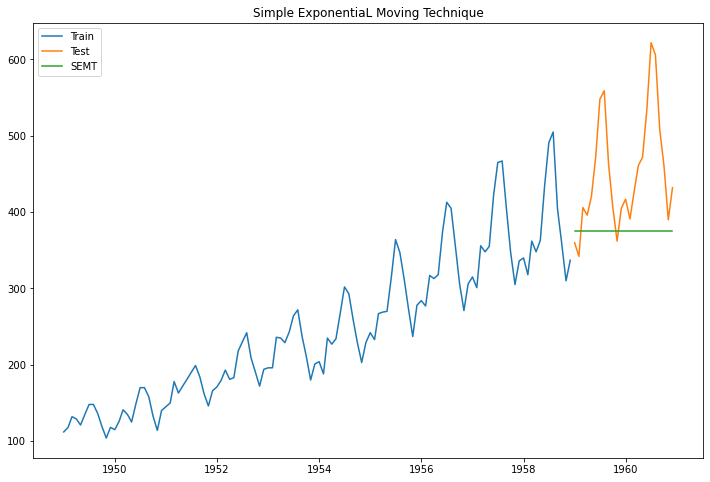

In [39]:
plt.figure(figsize=(12,8))
plt.plot(train_data['Passengers'], label='Train')
plt.plot(test_data['Passengers'], label='Test')
plt.plot(semt_forecast_df['Forecast'], label='SEMT')
plt.legend(loc='best')
plt.title('Simple ExponentiaL Moving Technique')
plt.show()

In [40]:
model=SimpleExpSmoothing(train_data.Passengers)

In [41]:
model_fit_1=model.fit(smoothing_level=0.1, optimized=False)
model_fit_1.params

{'smoothing_level': 0.1,
 'smoothing_slope': None,
 'smoothing_seasonal': None,
 'damping_slope': nan,
 'initial_level': 112.0,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [42]:
semt_forecast_df['Forecast_1']=model_fit_1.forecast(24)

In [43]:
mfe_6=np.mean(semt_forecast_df['Passengers']-semt_forecast_df['Forecast_1'])
mae_6=np.mean(abs(semt_forecast_df['Passengers']-semt_forecast_df['Forecast_1']))
mape_6=np.mean(100*abs(semt_forecast_df['Passengers']-semt_forecast_df['Forecast_1'])/semt_forecast_df['Passengers'])
mse_6=np.mean((semt_forecast_df['Passengers']-semt_forecast_df['Forecast_1'])**2)
rmse_6=np.sqrt(mse_5)

In [44]:
Model_Eval=Model_Eval.append({'Model':'Simple Exponential Moving Average_1',
                              'MFE': mfe_6,
                              'MAE': mae_6,
                              'MAPE': mape_6,
                              'MSE': mse_6,
                              'RMSE': rmse_6}, ignore_index=True)
Model_Eval

,Model,MFE,MAE,MAPE,MSE,RMSE
0,Naive Method,-115.541667,115.541667,23.632535,18909.125000,137.510454
1,Simple average method,-206.650000,206.650000,44.278566,48263.470764,219.689487
2,Simple Moving Average,-71.541667,78.125000,15.535497,10677.458333,103.331788
3,Simple Moving Average_6,-51.541667,65.291667,12.967391,8215.791667,90.641004
4,Simple Moving Average_3,-117.208333,117.208333,24.010217,19297.041667,138.913792
5,Simple Exponential Moving Average,77.644340,82.702005,16.487970,11587.891791,107.647071
6,Simple Exponential Moving Average_1,79.181185,83.854639,16.727833,11828.908309,107.647071


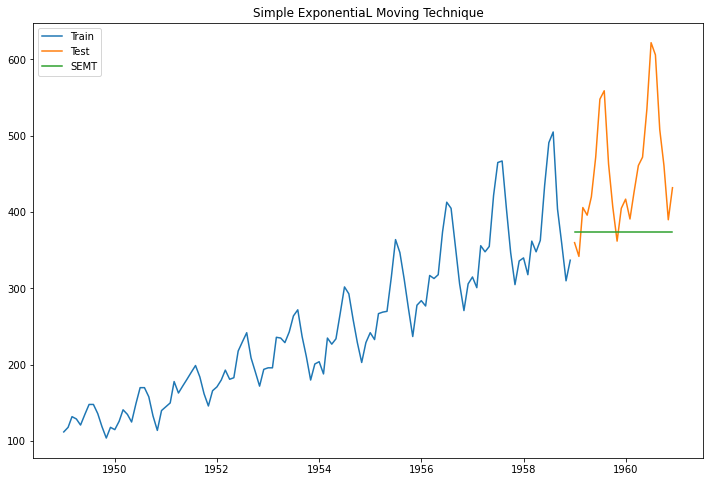

In [45]:
plt.figure(figsize=(12,8))
plt.plot(train_data['Passengers'], label='Train')
plt.plot(test_data['Passengers'], label='Test')
plt.plot(semt_forecast_df['Forecast_1'], label='SEMT')
plt.legend(loc='best')
plt.title('Simple ExponentiaL Moving Technique')
plt.show()

**This method only captures the level of the time series and neither the trend nor seasonality**

# **Holt's Exponential Smootihing Technique**

In [46]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [47]:
model=ExponentialSmoothing(np.asarray(train_data.Passengers), seasonal_periods=12, trend='additive', seasonal=None)
model_fit=model.fit(smoothing_level=0.2, smoothing_slope=0.2, optimized=False)
print(model_fit.params)
hest_df=test_data.copy()
hest_df['forecast']=model_fit.forecast(24)
hest_df.head()

{'smoothing_level': 0.2, 'smoothing_slope': 0.2, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 112.0, 'initial_slope': 6.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


,Passengers,Missing_Value_Imputation_Mean,Missing_Values_Linear_Interpolation,forecast
Month,,,,
1959-01-01,360.0,360.0,360.0,386.650468
1959-02-01,342.0,342.0,342.0,385.053399
1959-03-01,406.0,406.0,406.0,383.456331
1959-04-01,396.0,396.0,396.0,381.859263
1959-05-01,420.0,420.0,420.0,380.262194


In [48]:
mfe_7=np.mean(hest_df['Passengers']-hest_df['forecast'])
mae_7=np.mean(abs(hest_df['Passengers']-hest_df['forecast']))
mape_7=np.mean(100*abs(hest_df['Passengers']-hest_df['forecast'])/hest_df['Passengers'])
mse_7=np.mean((hest_df['Passengers']-hest_df['forecast'])**2)
rmse_7=np.sqrt(mse_7)

In [49]:
Model_Eval=Model_Eval.append({'Model':'Holts Exponential Smoothing Method',
                              'MFE': mfe_7,
                              'MAE': mae_7,
                              'MAPE': mape_7,
                              'MSE': mse_7,
                              'RMSE': rmse_7}, ignore_index=True)
Model_Eval

,Model,MFE,MAE,MAPE,MSE,RMSE
0,Naive Method,-115.541667,115.541667,23.632535,18909.125000,137.510454
1,Simple average method,-206.650000,206.650000,44.278566,48263.470764,219.689487
2,Simple Moving Average,-71.541667,78.125000,15.535497,10677.458333,103.331788
3,Simple Moving Average_6,-51.541667,65.291667,12.967391,8215.791667,90.641004
4,Simple Moving Average_3,-117.208333,117.208333,24.010217,19297.041667,138.913792
5,Simple Exponential Moving Average,77.644340,82.702005,16.487970,11587.891791,107.647071
6,Simple Exponential Moving Average_1,79.181185,83.854639,16.727833,11828.908309,107.647071
7,Holts Exponential Smoothing Method,84.257486,90.789456,18.247412,13420.082862,115.845081


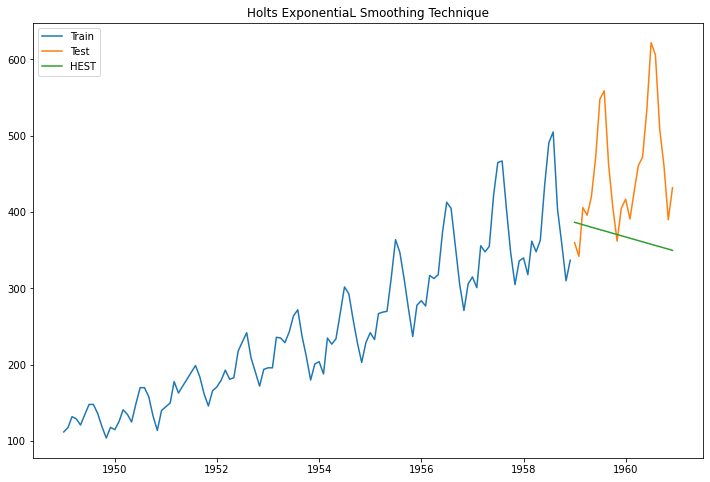

In [50]:
plt.figure(figsize=(12,8))
plt.plot(train_data['Passengers'], label='Train')
plt.plot(test_data['Passengers'], label='Test')
plt.plot(hest_df['forecast'], label='HEST')
plt.legend(loc='best')
plt.title('Holts ExponentiaL Smoothing Technique')
plt.show()

In [51]:
model=ExponentialSmoothing(np.asarray(train_data.Passengers), seasonal_periods=12, trend='additive', seasonal=None)
model_fit=model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
hest_df=test_data.copy()
hest_df['forecast_1']=model_fit.forecast(24)
hest_df.head()

{'smoothing_level': 0.2, 'smoothing_slope': 0.01, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 112.0, 'initial_slope': 6.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


,Passengers,Missing_Value_Imputation_Mean,Missing_Values_Linear_Interpolation,forecast_1
Month,,,,
1959-01-01,360.0,360.0,360.0,393.060661
1959-02-01,342.0,342.0,342.0,396.446928
1959-03-01,406.0,406.0,406.0,399.833196
1959-04-01,396.0,396.0,396.0,403.219463
1959-05-01,420.0,420.0,420.0,406.605731


In [52]:
mfe_7=np.mean(hest_df['Passengers']-hest_df['forecast_1'])
mae_7=np.mean(abs(hest_df['Passengers']-hest_df['forecast_1']))
mape_7=np.mean(100*abs(hest_df['Passengers']-hest_df['forecast_1'])/hest_df['Passengers'])
mse_7=np.mean((hest_df['Passengers']-hest_df['forecast_1'])**2)
rmse_7=np.sqrt(mse_7)

In [53]:
Model_Eval=Model_Eval.append({'Model':'Holts Exponential Smoothing Method_1',
                              'MFE': mfe_7,
                              'MAE': mae_7,
                              'MAPE': mape_7,
                              'MSE': mse_7,
                              'RMSE': rmse_7}, ignore_index=True)
Model_Eval

,Model,MFE,MAE,MAPE,MSE,RMSE
0,Naive Method,-115.541667,115.541667,23.632535,18909.125000,137.510454
1,Simple average method,-206.650000,206.650000,44.278566,48263.470764,219.689487
2,Simple Moving Average,-71.541667,78.125000,15.535497,10677.458333,103.331788
3,Simple Moving Average_6,-51.541667,65.291667,12.967391,8215.791667,90.641004
4,Simple Moving Average_3,-117.208333,117.208333,24.010217,19297.041667,138.913792
5,Simple Exponential Moving Average,77.644340,82.702005,16.487970,11587.891791,107.647071
6,Simple Exponential Moving Average_1,79.181185,83.854639,16.727833,11828.908309,107.647071
7,Holts Exponential Smoothing Method,84.257486,90.789456,18.247412,13420.082862,115.845081
8,Holts Exponential Smoothing Method_1,20.538929,53.740522,11.109112,5175.052406,71.937837


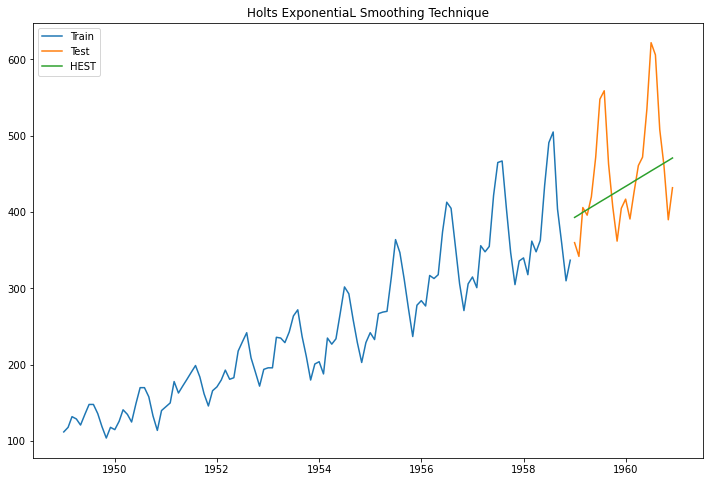

In [54]:
plt.figure(figsize=(12,8))
plt.plot(train_data['Passengers'], label='Train')
plt.plot(test_data['Passengers'], label='Test')
plt.plot(hest_df['forecast_1'], label='HEST')
plt.legend(loc='best')
plt.title('Holts ExponentiaL Smoothing Technique')
plt.show()

Lower the value of smooting_slope(beta) we do a good job at calculating a long term trend and higher the value of beta, we do a good job at finding the short term trend.

# **Holt Winter's Exponential Smootihing Technique**

In [55]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model=ExponentialSmoothing(np.asarray(train_data.Passengers), seasonal_periods=12, seasonal='add', trend='add')

In [56]:
model_fit_2=model.fit(optimized=True)
hwest_df=test_data.copy()
hwest_df['forecast']=model_fit_2.forecast(24)

In [57]:
hwest_df.head()

,Passengers,Missing_Value_Imputation_Mean,Missing_Values_Linear_Interpolation,forecast
Month,,,,
1959-01-01,360.0,360.0,360.0,354.124651
1959-02-01,342.0,342.0,342.0,338.193991
1959-03-01,406.0,406.0,406.0,389.151129
1959-04-01,396.0,396.0,396.0,381.953611
1959-05-01,420.0,420.0,420.0,399.851126


In [58]:
mfe_8=np.mean(hwest_df['Passengers']-hwest_df['forecast'])
mae_8=np.mean(abs(hwest_df['Passengers']-hwest_df['forecast']))
mape_8=np.mean(100*abs(hwest_df['Passengers']-hwest_df['forecast'])/hwest_df['Passengers'])
mse_8=np.mean((hwest_df['Passengers']-hwest_df['forecast'])**2)
rmse_8=np.sqrt(mse_8)

In [59]:
Model_Eval=Model_Eval.append({'Model':'Holt Winters Exponential Smoothing Method',
                              'MFE': mfe_8,
                              'MAE': mae_8,
                              'MAPE': mape_8,
                              'MSE': mse_8,
                              'RMSE': rmse_8}, ignore_index=True)
Model_Eval

,Model,MFE,MAE,MAPE,MSE,RMSE
0,Naive Method,-115.541667,115.541667,23.632535,18909.125000,137.510454
1,Simple average method,-206.650000,206.650000,44.278566,48263.470764,219.689487
2,Simple Moving Average,-71.541667,78.125000,15.535497,10677.458333,103.331788
3,Simple Moving Average_6,-51.541667,65.291667,12.967391,8215.791667,90.641004
4,Simple Moving Average_3,-117.208333,117.208333,24.010217,19297.041667,138.913792
5,Simple Exponential Moving Average,77.644340,82.702005,16.487970,11587.891791,107.647071
6,Simple Exponential Moving Average_1,79.181185,83.854639,16.727833,11828.908309,107.647071
7,Holts Exponential Smoothing Method,84.257486,90.789456,18.247412,13420.082862,115.845081
8,Holts Exponential Smoothing Method_1,20.538929,53.740522,11.109112,5175.052406,71.937837
9,Holt Winters Exponential Smoothing Method,30.513052,30.513052,6.525966,1231.679453,35.095291


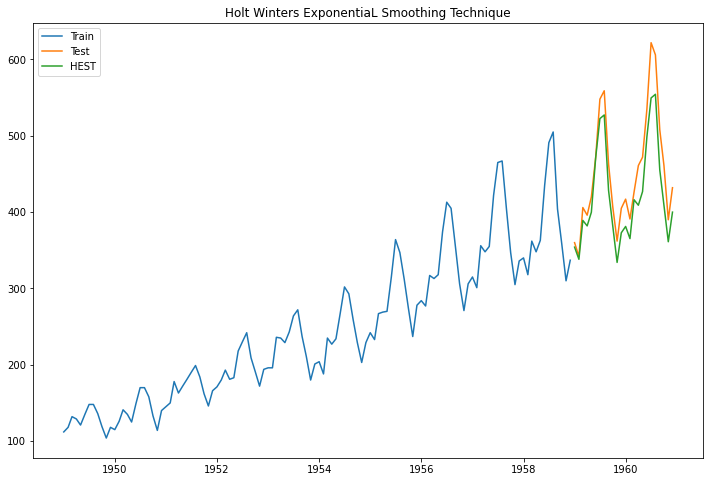

In [60]:
plt.figure(figsize=(12,8))
plt.plot(train_data['Passengers'], label='Train')
plt.plot(test_data['Passengers'], label='Test')
plt.plot(hwest_df['forecast'], label='HEST')
plt.legend(loc='best')
plt.title('Holt Winters ExponentiaL Smoothing Technique')
plt.show()

## **Trying everything with a newer dataset**

In [61]:
df=pd.read_csv('Metrail+dataset.csv')
df.head()

FileNotFoundError: [Errno 2] File Metrail+dataset.csv does not exist: 'Metrail+dataset.csv'

In [ ]:
df.Month=pd.to_datetime(df.Month, format='%b-%y')
df.head()

In [ ]:
df.columns=['Month', 'Travellers']

In [ ]:
df['Missing val prev']=df['Travellers'].fillna(method='pad')
df['Missing val prev'].mean()

In [ ]:
df['Missing val next']=df['Travellers'].fillna(method='bfill')
df['Missing val next'].mean()

In [ ]:
df['Missing val Interpolation']=df['Travellers'].fillna(df['Travellers'].interpolate(method='linear'))
df['Missing val Interpolation'].mean()

In [ ]:
df2=pd.read_csv('exchange-rate-twi.csv')
df2.head()

In [ ]:
df2['Exchange Rate TWI'].isnull().sum()

In [ ]:
df2.shape

In [ ]:
df2_train=df2.iloc[:212,:]
df2_test=df2.iloc[212:,:]

In [ ]:
df2_train['Exchange Rate TWI'].mean()

In [ ]:
df2_train.shape

In [ ]:
df2_train.iloc[211,:]

In [ ]:
df2_test_sim_avg=df2_test.copy()
df2_test_sim_avg['Sim']=df2_train['Exchange Rate TWI'].mean()

In [ ]:
RMSE_df2=np.sqrt(np.mean((df2_test_sim_avg['Exchange Rate TWI']-df2_test_sim_avg['Sim'])**2))
MAPE_df2=np.mean(100*abs(df2_test_sim_avg['Exchange Rate TWI']-df2_test_sim_avg['Sim'])/df2_test_sim_avg['Exchange Rate TWI'])
print(RMSE_df2, MAPE_df2)

In [ ]:
df2_test_sim_avg['Naive']=52
RMSE_df3=np.sqrt(np.mean((df2_test_sim_avg['Exchange Rate TWI']-df2_test_sim_avg['Naive'])**2))
MAPE_df3=np.mean(100*abs(df2_test_sim_avg['Exchange Rate TWI']-df2_test_sim_avg['Naive'])/df2_test_sim_avg['Exchange Rate TWI'])
print(RMSE_df3, MAPE_df3)

In [ ]:
Acc=100-MAPE_df3

In [ ]:
Acc